In [ ]:
print("hello world")

hello world


### Create a folder and download Titanic dataset

In [ ]:
import os
import requests

data_folder = "data"
if not os.path.exists(data_folder):
  os.mkdir(data_folder)

def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
      with requests.get(url, stream=True, allow_redirects=True) as r:
          with open(filename, 'wb') as f:
              for chunk in r.iter_content(chunk_size=8192):
                  f.write(chunk)
      print('Downloaded', filename)

download('https://github.com/trgtulas/DataVisProject/raw/refs/heads/main/Titanicdata.csv')

Downloaded data/Titanicdata.csv


### Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import altair as alt
import plotly.io as pio

### Assign the dataset

In [ ]:
dataset = pd.read_csv('data/Titanicdata.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Handling the missing values via SimpleImputer with strategies such as mean, most frequent

In [ ]:
ageImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
age = dataset[['Age']]
ageImputer = ageImputer.fit(age)
age = ageImputer.transform(age)

fareImputer = SimpleImputer(missing_values=np.nan, strategy="mean")
fare = dataset[['Fare']]
fareImputer = fareImputer.fit(fare)
fare = fareImputer.transform(fare)

embarkedImputer = SimpleImputer(strategy='most_frequent')
dataset[['Embarked']] = embarkedImputer.fit_transform(dataset[['Embarked']])


dataset['Age'] = age
dataset['Fare'] = fare

dataset[
    (dataset.PassengerId <= 831 ) &
    (dataset.PassengerId >= 62)
]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.000000,0,0,113572,80.0000,B28,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,29.881138,0,0,PC 17605,27.7208,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,29.881138,1,1,2661,15.2458,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
826,827,0,3,"Lam, Mr. Len",male,29.881138,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.000000,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,29.881138,0,0,367228,7.7500,NaN,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.000000,0,0,113572,80.0000,B28,S


In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


### How do age and fare affects to survival rates?

In [ ]:
#ALTAIR CHRAT

alt_data = dataset

scatter_plot = alt.Chart(alt_data).mark_circle(size=50).encode(
    x=alt.X('Age:Q', title='Age', scale=alt.Scale(domain=(0, 80))),
    y=alt.Y('Fare:Q', title='Fare'),
    color=alt.Color('Survived:N', title='Survived Status', scale=alt.Scale(
        domain=[0, 1],
        range=['brown', 'green']
    )),
    tooltip=['Age', 'Fare', 'Survived']).properties(
    width=600,
    height=400,
    title='Survival rate by Age and Fare'
).interactive()

scatter_plot.display()

alt.Chart(...)

### What is the effect of port that Passengers embarked to survival rate

In [ ]:
import plotly.express as px

sunburst_data = dict(dataset)
sunburst_data['Survived'] = sunburst_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})
sunburst_data['Embarked'] = sunburst_data['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

sunburst_chart = px.sunburst(sunburst_data, path=['Embarked', 'Survived'])

sunburst_chart.update_layout(title_text='Survival rate by Embarked Ports', title_x=0.5)
sunburst_chart.update_traces(
    hovertemplate="<b>Port: %{id}</b><br>"
                  "Survival Status: %{label}<br>"
                  "Count: %{value}"
)
pio.show(sunburst_chart)

### What is the survival rate by sex and passenger class?

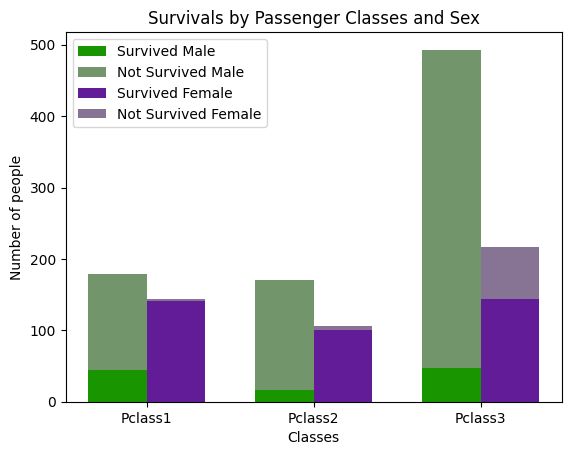

In [ ]:
#STACKED BAR CHART

surv_femaleClass1 = len(list(dataset.PassengerId[
    (dataset.Survived==1) &
     (dataset.Sex=='female') &
      (dataset.Pclass==1)]))
surv_maleClass1 = len(list(dataset.PassengerId[
    (dataset.Survived==1) &
     (dataset.Sex=='male') &
      (dataset.Pclass==1)]))
notsurv_femaleClass1 = len(list(dataset.PassengerId[
    (dataset.Survived==0) &
     (dataset.Sex=='female') &
      (dataset.Pclass==1)]))
notsurv_maleClass1 = len(list(dataset.PassengerId[
    (dataset.Survived==0) &
     (dataset.Sex=='male') &
      (dataset.Pclass==1)]))

surv_femaleClass2 = len(list(dataset.PassengerId[
    (dataset.Survived==1) &
     (dataset.Sex=='female') &
      (dataset.Pclass==2)]))
surv_maleClass2 = len(list(dataset.PassengerId[
    (dataset.Survived==1) &
     (dataset.Sex=='male') &
      (dataset.Pclass==2)]))
notsurv_femaleClass2 = len(list(dataset.PassengerId[
    (dataset.Survived==0) &
     (dataset.Sex=='female') &
      (dataset.Pclass==2)]))
notsurv_maleClass2 = len(list(dataset.PassengerId[
    (dataset.Survived==0) &
     (dataset.Sex=='male') &
      (dataset.Pclass==2)]))

surv_femaleClass3 = len(list(dataset.PassengerId[
    (dataset.Survived==1) &
     (dataset.Sex=='female') &
      (dataset.Pclass==3)]))
surv_maleClass3 = len(list(dataset.PassengerId[
    (dataset.Survived==1) &
     (dataset.Sex=='male') &
      (dataset.Pclass==3)]))
notsurv_femaleClass3 = len(list(dataset.PassengerId[
    (dataset.Survived==0) &
     (dataset.Sex=='female') &
      (dataset.Pclass==3)]))
notsurv_maleClass3 = len(list(dataset.PassengerId[
    (dataset.Survived==0) &
     (dataset.Sex=='male') &
      (dataset.Pclass==3)]))

categories = ['Pclass1','Pclass2','Pclass3']

group1_a = [surv_maleClass1, surv_maleClass2, surv_maleClass3]
group1_b = [notsurv_maleClass1, notsurv_maleClass2, notsurv_maleClass3]

group2_a = [surv_femaleClass1, surv_femaleClass2, surv_femaleClass3]
group2_b = [notsurv_femaleClass1, notsurv_femaleClass2, notsurv_femaleClass3]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()

# Group 1
ax.bar(x - width/2, group1_a, width, label='Survived Male', color='#199500')
ax.bar(x - width/2, group1_b, width, bottom=group1_a, label='Not Survived Male', color='#73956C')

# Group 2
ax.bar(x + width/2, group2_a, width, label='Survived Female', color='#621C97')
ax.bar(x + width/2, group2_b, width, bottom=group2_a, label='Not Survived Female', color='#877495')

ax.set_xlabel('Classes')
ax.set_ylabel('Number of people')
ax.set_title('Survivals by Passenger Classes and Sex')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


### What is the survival rate by age group and passenger class?

In [ ]:
import plotly.express as px

heatmap_data3 = dataset
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

heatmap_data3['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

heatmap_data3['Pclass'] = heatmap_data3['Pclass'].astype(str)

pivot_table = heatmap_data3.pivot_table(
    index='Age Group',
    columns='Pclass',
    values='Survived',
    aggfunc='mean',
    fill_value=0
) * 100

pivot_table = pivot_table.reset_index()
melted_data = pivot_table.melt(id_vars='Age Group', var_name='Pclass', value_name='Percentage')
fig = px.density_heatmap(
    melted_data,
    x='Pclass',
    y='Age Group',
    z='Percentage',
    color_continuous_scale='BuGn',
    text_auto='.1f',
    title='Percentage of Survivors by Age Group and Passenger Class'
)

fig.update_traces(hovertemplate="Pclass: %{x}<br>Age Group: %{y}<br>Survival Percentage: %{z:.1f}%")

fig.update_layout(
    xaxis_title='Passenger Class',
    yaxis_title='Age Group',
    xaxis=dict(tickmode='array', tickvals=['1', '2', '3'], title='Passenger Class'),
    coloraxis_colorbar=dict(title='Survival Percentage (%)')
)

fig.show()

<ipython-input-10-7136cf6c05be>:11: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



### Which age groups were more likely to survive?


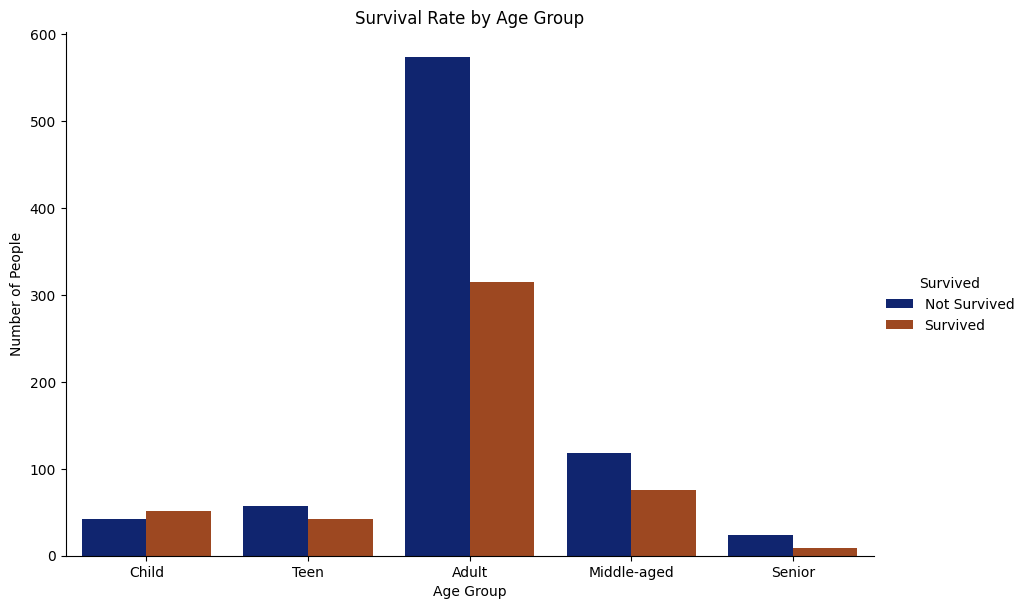

In [ ]:
bar_chart = dataset

df = pd.DataFrame(bar_chart)

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df['Survived'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
sns.catplot(data=df, x='AgeGroup', hue='Survived', kind='count', palette='dark', height=6, aspect=1.5)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.show()


In [ ]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S,20-30
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,30-40
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,30-40
1307,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S,20-30
